## Load useful libraries

In [1]:
import json
import datetime
import numpy as np

import sys
import os
bds_home = os.environ['BDS_HOME']
sys.path.append(bds_home)

from bds.forecasting.prepare_AWS_EC2_spot_price_data.ec2SpotPriceData import ec2SpotPriceData

## Load user settings

In [2]:
configuration_json_filename = 'configuration.json'

## Retrieve ec2 spot price data

In [3]:
ec2_spot_price_data_instance = ec2SpotPriceData(
    configuration_json_filename,
)

In [4]:
ec2_spot_price_data_instance.fit()

## QC

In [5]:
df = ec2_spot_price_data_instance.df

In [6]:
df

,spot_price,Timestamp,date_not_time
Timestamp,,,
2024-09-27 00:00:00+00:00,0.074533,2024-09-27 00:00:00+00:00,2024-09-27
2024-09-28 00:00:00+00:00,0.075167,2024-09-28 00:00:00+00:00,2024-09-28
2024-09-29 00:00:00+00:00,0.075200,2024-09-29 00:00:00+00:00,2024-09-29
2024-09-30 00:00:00+00:00,0.074050,2024-09-30 00:00:00+00:00,2024-09-30
2024-10-01 00:00:00+00:00,0.074100,2024-10-01 00:00:00+00:00,2024-10-01
...,...,...,...
2024-12-21 00:00:00+00:00,0.067520,2024-12-21 00:00:00+00:00,2024-12-21
2024-12-22 00:00:00+00:00,0.068067,2024-12-22 00:00:00+00:00,2024-12-22
2024-12-23 00:00:00+00:00,0.067700,2024-12-23 00:00:00+00:00,2024-12-23


In [7]:
ec2_spot_price_data_instance.df_pre_resample

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp,date_not_time
Timestamp,,,,,,
2024-09-27 09:32:53+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.075100,2024-09-27 09:32:53+00:00,2024-09-27
2024-09-27 14:02:44+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.074200,2024-09-27 14:02:44+00:00,2024-09-27
2024-09-27 23:03:29+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.074300,2024-09-27 23:03:29+00:00,2024-09-27
2024-09-28 07:03:28+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.075000,2024-09-28 07:03:28+00:00,2024-09-28
2024-09-28 15:02:38+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.075300,2024-09-28 15:02:38+00:00,2024-09-28
...,...,...,...,...,...,...
2024-12-25 12:32:56+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.069100,2024-12-25 12:32:56+00:00,2024-12-25
2024-12-25 17:48:39+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.069500,2024-12-25 17:48:39+00:00,2024-12-25
2024-12-25 00:31:51+00:00,us-west-2a,m2.xlarge,Linux/UNIX,0.068900,2024-12-25 00:31:51+00:00,2024-12-25


In [8]:
min(ec2_spot_price_data_instance.df_pre_resample['Timestamp'])

Timestamp('2024-09-27 09:32:53+0000', tz='tzutc()')

In [9]:
max(ec2_spot_price_data_instance.df_pre_resample['Timestamp'])

Timestamp('2024-12-25 22:47:40+0000', tz='tzutc()')

## Plot

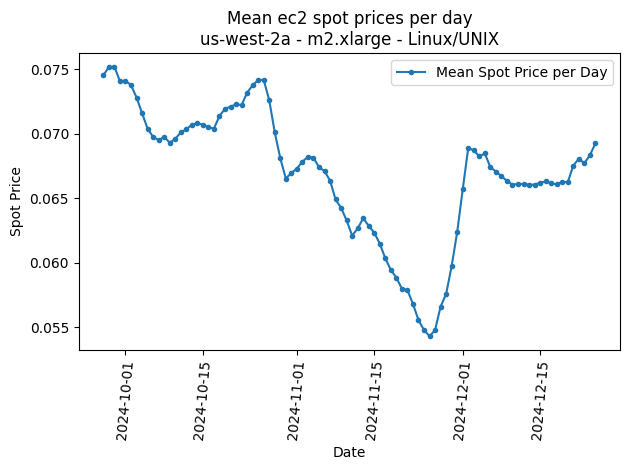

In [10]:
ec2_spot_price_data_instance.plot(save = True)

## Save

In [11]:
ec2_spot_price_data_instance.save()